# Imports

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tifffile as tiff
import matplotlib
from matplotlib import pyplot as plt
from PIL import Image
import skimage
from skimage.io import imread, imsave
from pathlib import Path
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import tensorflow as tf
import keras
import keras.layers

sys.path.insert(0, '../')
from src.utils import *
from src.config import *
from src.prepare_data import prepare_SPARCS, prepare_biome8, prepare_S2
from skimage.util import view_as_windows
import glob

seed_value = 42

# Set the random seed for Python's built-in random module
random.seed(seed_value)

# Set the random seed for numpy
np.random.seed(seed_value)

# Set the random seed for TensorFlow
tf.random.set_seed(seed_value)

2023-08-28 19:02:18.209659: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 19:02:18.254153: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-28 19:02:18.254850: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 19:02:19.114544: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Models trained with SPARCS

## Losses

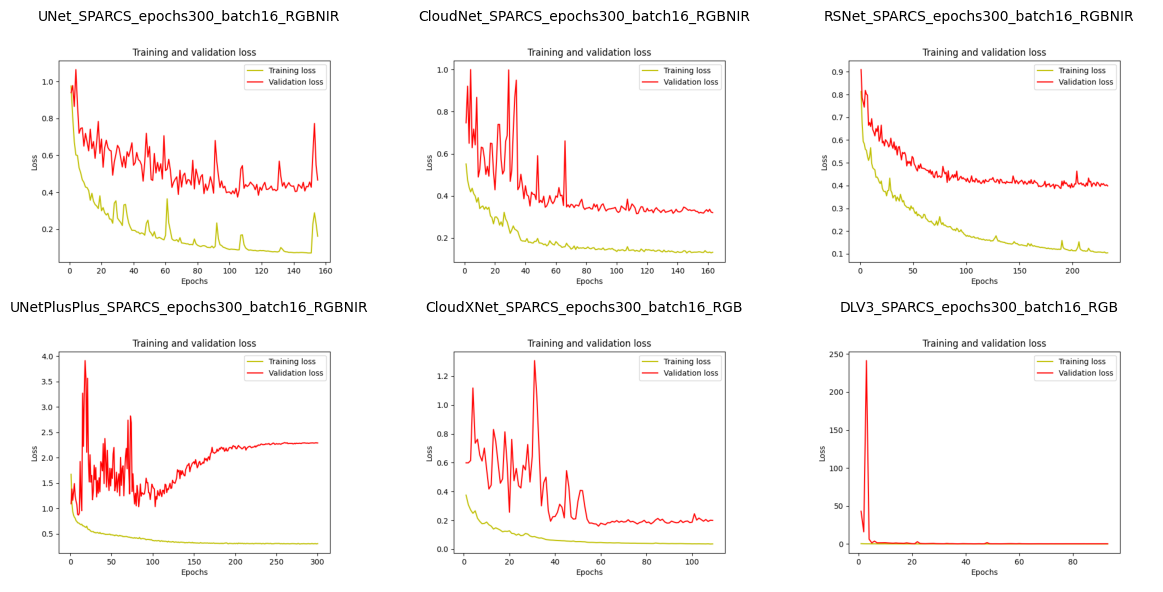

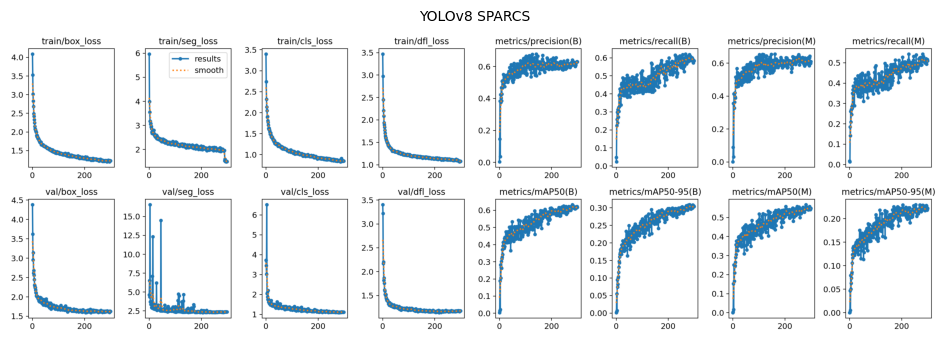

In [22]:
# List of paths to your saved PNG images
image_paths = []
for dir in glob.glob(str(project_root_path / 'logs/fit/*SPARCS*/*/loss.png')):
    # print(dir)
    image_paths.append(dir)
    
# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Load and display the images on the subplots
for i, image_path in enumerate(image_paths):
    row = i // 3
    col = i % 3
    img = imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # Turn off axis labels and ticks
    axes[row, col].set_title(image_path.split('/')[-3], fontsize=10)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(imread(notebooks_path / "runs/segment/yolov8n_pre_epochs300_batch16_SPARCS/results.png"))
plt.axis('off')
plt.title("YOLOv8 SPARCS", fontsize=10)
plt.show()

# Models trained with Biome

## Losses

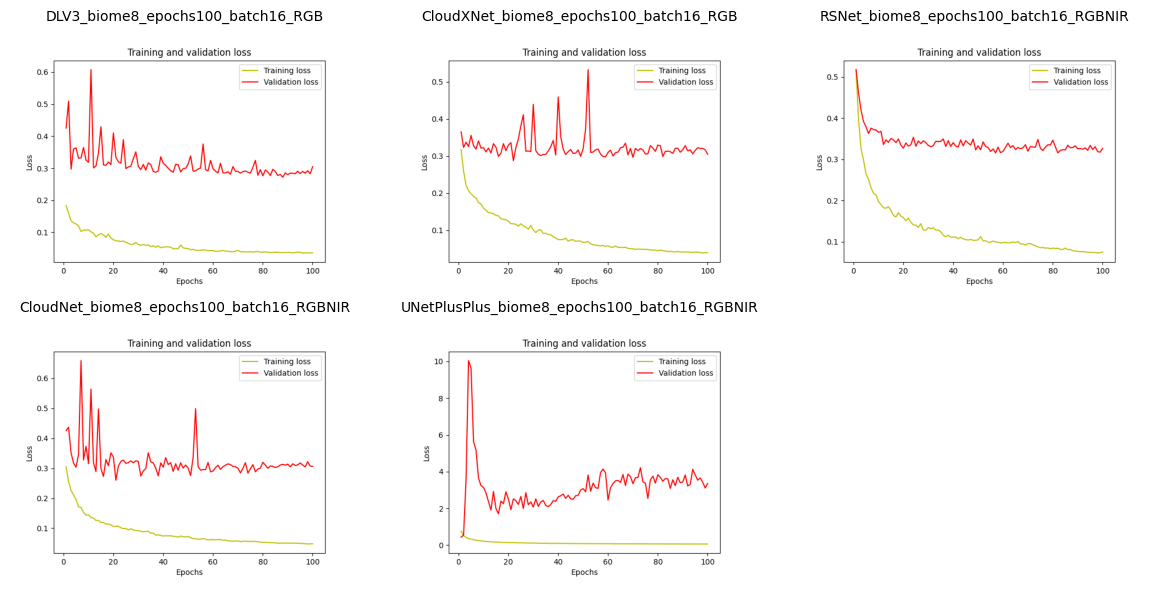

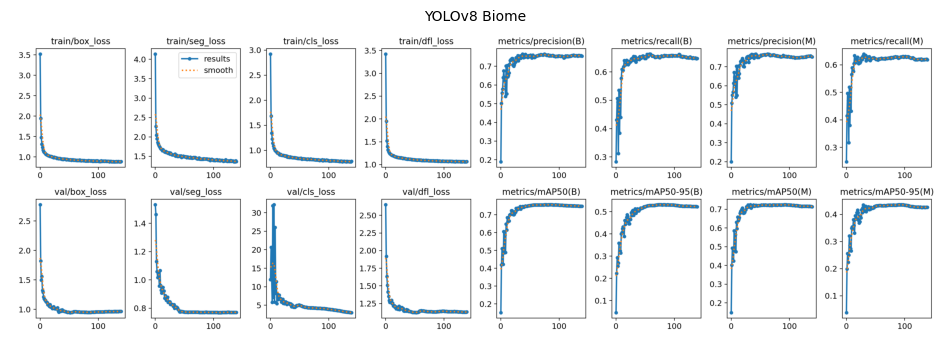

In [26]:
# List of paths to your saved PNG images
image_paths = []
for dir in glob.glob(str(project_root_path / 'logs/fit/*biome8*/*/loss.png')):
    # print(dir)
    image_paths.append(dir)
    
# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Load and display the images on the subplots
for i, image_path in enumerate(image_paths):
    row = i // 3
    col = i % 3
    img = imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')  # Turn off axis labels and ticks
    axes[row, col].set_title(image_path.split('/')[-3], fontsize=10)

# Remove the plot axes
plt.delaxes(plt.subplot(2, 3, 6))

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


plt.figure(figsize=(12, 6))
plt.imshow(imread(notebooks_path / "runs/segment/yolov8n_pre_epochs300_batch16_Biome/results.png"))
plt.axis('off')
plt.title("YOLOv8 Biome", fontsize=10)
plt.show()